## Prerequisites

### Imports

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import sys
import matplotlib 
%matplotlib inline 

### Versioning

In [75]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)
# Written in Jupyter Notebook at VS Code using Python Environment Kernel defined in conda

Python version 3.11.2 (main, Mar 27 2023, 23:42:44) [GCC 11.2.0]
Pandas version 1.5.3
Matplotlib version 3.7.1


This notebook ran at VSCode with Python Environment Kernel isolated inside conda environment. *It has not been tested in Google Colab*.

Here are the possible packages that used in this notebook with their corresponding versions.

In [76]:
!conda list -n tede

# packages in environment at /home/thanasistrisp/anaconda3/envs/tede:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
_openmp_mutex             5.1                       1_gnu  
adjusttext                0.8                      pypi_0    pypi
appdirs                   1.4.4              pyhd3eb1b0_0  
asttokens                 2.0.5              pyhd3eb1b0_0  
autopep8                  1.6.0              pyhd3eb1b0_1  
backcall                  0.2.0              pyhd3eb1b0_0  
beautifulsoup4            4.12.0          py311h06a4308_0  
blas                      1.0                         mkl  
bottleneck                1.3.5           py311hbed6279_0  
brotli                    1.0.9                h5eee18b_7  
brotli-bin                1.0.9                h5eee18b_7  
brotlipy                  0.7.0           py311h5eee18b_1002  
bs4                       4.12.0           py38hd3eb1b0_0  
bzip2       

## Question 1

In [77]:
Location = r"marketing_campaign.csv"

df = pd.read_csv(Location, delimiter="\t")

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Missing Values

In [79]:
df.isnull().sum()[df.isnull().sum() > 0]

Income    24
dtype: int64

In [80]:
print("Missing values will be replaced with ", df['Income'].mean())
df['Income'].fillna(df['Income'].mean(), inplace=True)

Missing values will be replaced with  52247.3


### Conversion to appropriate types

In [81]:
# convert dates to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
print(df.Dt_Customer.dtype)

datetime64[ns]


In [82]:
edu_mapping = {label:idx for idx,label in enumerate(np.unique(df['Education']))}
df['Education'] = df['Education'].map(edu_mapping)

marital_mapping = {label:idx for idx,label in enumerate(np.unique(df['Marital_Status']))}
df['Marital_Status'] = df['Marital_Status'].map(marital_mapping)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [83]:
# check that no object type variables remain
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   int64         
 3   Marital_Status       2240 non-null   int64         
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## Question 2

### Unique Values in categorical characteristics

In [84]:
print("Marital Status:", marital_mapping)
print("Education:", edu_mapping)

Marital Status: {'Absurd': 0, 'Alone': 1, 'Divorced': 2, 'Married': 3, 'Single': 4, 'Together': 5, 'Widow': 6, 'YOLO': 7}
Education: {'2n Cycle': 0, 'Basic': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4}


In [85]:
for key in marital_mapping.keys():
	print(key, df['Marital_Status'].value_counts()[marital_mapping[key]])

Absurd 2
Alone 3
Divorced 232
Married 864
Single 480
Together 580
Widow 77
YOLO 2


### Change values of Alone,Absurd,YOLO of Marital_Status to Single

In [86]:
# Change values of Alone,Absurd,YOLO of Marital_Status in dataset
df.loc[df['Marital_Status'] == marital_mapping['Alone'], 'Marital_Status'] = marital_mapping['Single']
df.loc[df['Marital_Status'] == marital_mapping['Absurd'], 'Marital_Status'] = marital_mapping['Single']
df.loc[df['Marital_Status'] == marital_mapping['YOLO'], 'Marital_Status'] = marital_mapping['Single']

# update numerical values of Marital_Status to ascending order using factorize
df['Marital_Status'] = pd.factorize(df['Marital_Status'], sort=True)[0]

del marital_mapping['Alone']
del marital_mapping['Absurd']
del marital_mapping['YOLO']

marital_mapping = {label:idx for idx,label in enumerate(marital_mapping.keys())}
marital_mapping

{'Divorced': 0, 'Married': 1, 'Single': 2, 'Together': 3, 'Widow': 4}

In [87]:
# print frequency of each value in Marital_Status with names using marital_mapping
for key in marital_mapping.keys():
	print(key, df['Marital_Status'].value_counts()[marital_mapping[key]])

Divorced 232
Married 864
Single 487
Together 580
Widow 77


### Graphical representation of categorical characteristics

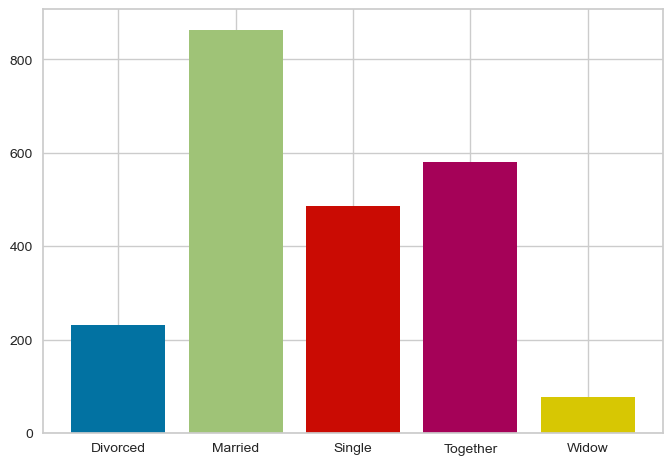

In [88]:
for key in marital_mapping.keys():
	plt.bar(key, df['Marital_Status'].value_counts()[marital_mapping[key]])
plt.show()

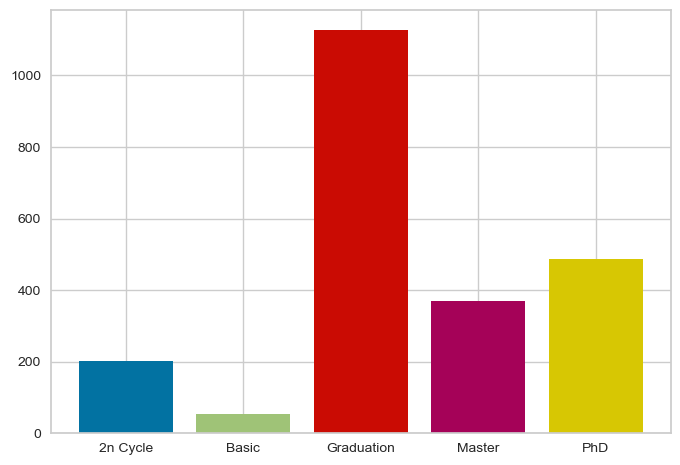

In [89]:
for key in edu_mapping.keys():
	plt.bar(key, df['Education'].value_counts()[edu_mapping[key]])
plt.show()

## Question 3

### Α

In [90]:
from datetime import date
cur_date = pd.to_datetime(date.today())

# result = (cur_date - recency) - Dt_Customer
recency = df['Recency'].apply(lambda x: cur_date - pd.Timedelta(x, unit='D'))
temp = recency - df['Dt_Customer']
# convert to int
df['Customer_For'] = temp.dt.days.astype(int)
df['Customer_For']

0       3820
1       3290
2       3501
3       3328
4       3282
        ... 
2235    3550
2236    3178
2237    3279
2238    3363
2239    3797
Name: Customer_For, Length: 2240, dtype: int64

### Β

In [91]:
# calculate Age from Year_Birth
df['Age'] = df['Year_Birth'].apply(lambda x: cur_date.year - x)
df['Age']

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2240, dtype: int64

### Γ

In [92]:
# total amount spent by customer
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Spent']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Spent, Length: 2240, dtype: int64

### Δ

In [93]:
# total children in family (including teen)
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Children']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2240, dtype: int64

### E

In [94]:
# family size indicates total number of people in family (if married, then spouse is included)
married = df['Marital_Status'].apply(lambda x: 1 if marital_mapping['Married'] == x or marital_mapping['Together'] == x else 0)
df['Family_Size'] = married + df['Children'] + 1
df['Family_Size']

0       1
1       3
2       2
3       3
4       3
       ..
2235    3
2236    5
2237    1
2238    3
2239    4
Name: Family_Size, Length: 2240, dtype: int64

### Στ

In [95]:
# is parent if has children
df['Is_Parent'] = df['Children'].apply(lambda x: 1 if x > 0 else 0)
df['Is_Parent']

0       0
1       1
2       0
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Is_Parent, Length: 2240, dtype: int64

### Ζ

In [96]:
# living with has two values: Partner and Alone
df['Living_With'] = df['Marital_Status'].apply(lambda x: 'Partner' if marital_mapping['Married'] == x or marital_mapping['Together'] == x else 'Alone')
living_with_mapping = {label:idx for idx,label in enumerate(np.unique(df['Living_With']))}
df['Living_With'] = df['Living_With'].map(living_with_mapping)
df['Living_With']

0       0
1       0
2       1
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Living_With, Length: 2240, dtype: int64

### Η

In [97]:
def age_group(age):
	if age >= 21 and age <= 30:
		return '21-30'
	elif age >= 31 and age <= 40:
		return '31-40'
	elif age >= 41 and age <= 50:
		return '41-50'
	elif age >= 51 and age <= 60:
		return '51-60'
	elif age >= 61 and age <= 70:
		return '61-70'
	elif age >= 71 and age <= 80:
		return '71-80'
	else:
		return '>80'

df['Age_Group'] = df['Age'].apply(age_group)
age_group_mapping = {label:idx for idx,label in enumerate(np.unique(df['Age_Group']))}
df['Age_Group'] = df['Age_Group'].map(age_group_mapping)
print(age_group_mapping)
for key in age_group_mapping.keys():
	print(key, df['Age_Group'].value_counts()[age_group_mapping[key]])

{'21-30': 0, '31-40': 1, '41-50': 2, '51-60': 3, '61-70': 4, '71-80': 5, '>80': 6}
21-30 15
31-40 286
41-50 620
51-60 620
61-70 465
71-80 229
>80 5


## Question 4

In [98]:
length = len(df)

### Illegal values

We first check for illegal values (negative numeric for costs and age and all entries with duplicate ID). We see that there are no illegal values in the dataset.

In [99]:
# age should be >= 21
df = df[df['Age'] >= 21]
# all columns should be >= 0 except date columns
for col in df.columns:
	if df[col].dtype != 'datetime64[ns]' and df[col].dtype != 'timedelta64[ns]':
		df = df[df[col] >= 0]
df = df.drop_duplicates(subset='ID', keep=False)

In [100]:
length == len(df)

True

### Outliers

We now find values that are outliers. Outliers are values that are far from the mean of the dataset. We use the Z-score method.

As an example, for the column "Income" we can visually see that the permitted range is $[0,15000]$. In this case, there are some outliers, one near $20000$ and other far away, more than $60000$. We can also see that the mean is around $5000$.

<Axes: xlabel='Income'>

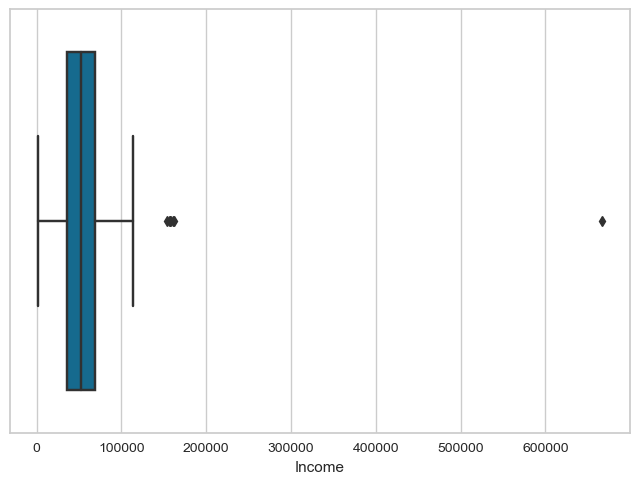

In [101]:
sns.boxplot(x=df['Income'])

Z- Score is known as standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers. Mathematically, z score is calculated as:
$$z = \frac{x - μ}{σ}$$
where, x is the data point, μ is the mean of the data and σ is the standard deviation of the data.

We choose selected columns that we think are important to find outliers. We prefer to use columns that have numeric values that are not categorical, binary or stable values (constants). Also, we do not filter the IDs, since they are unique and do not have any meaning.

Specifically, z-score can be described as follows:
- For each column, it first computes the Z-score of each value in the column, relative to the column mean and standard deviation.
- Then it takes the absolute of Z-score because the direction does not matter, only if it is below the threshold.
- `all(axis=1)` ensures that for each row, all column satisfy the constraint.
- We define the outlier threshold value as 3.0, because 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

In [102]:
from scipy.stats import zscore
selected_cols = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Spent', 'Customer_For']
df = df[(np.abs(zscore(df[selected_cols])) < 3).all(axis=1)]

For the above example, we can now see that outliers are gone.

<Axes: xlabel='Income'>

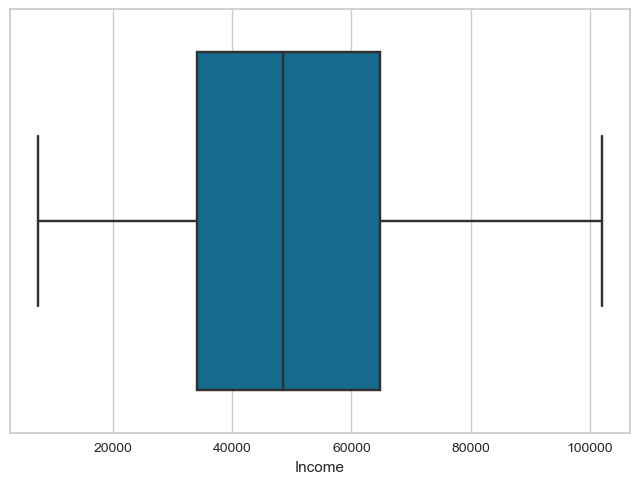

In [103]:
import seaborn as sns
sns.boxplot(x=df['Income'])

<Axes: xlabel='Income', ylabel='Count'>

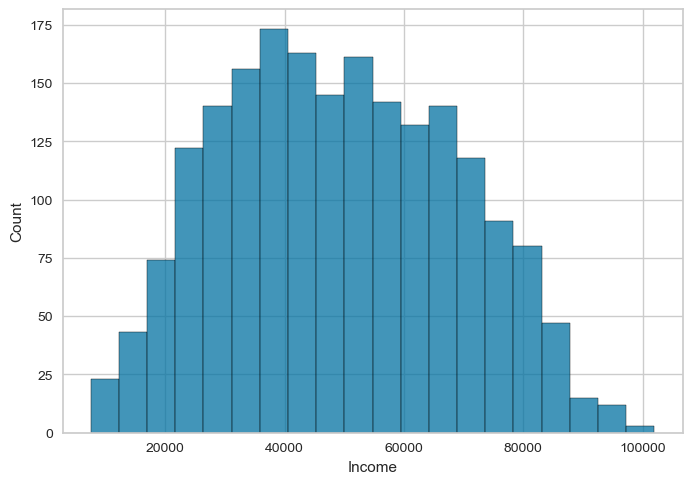

In [104]:
# visualize distribution of data for our example
sns.histplot(df['Income'])

We also calculate the percentage of deleted entries for all selected columns.

In [105]:
print("Total entries before removal:", length)
print("Total entries after removal:", len(df))
print("Removed entries:", length - len(df))

# percentage of data removed
print(f"Percentage of data removed: {round((length - len(df)) / length * 100, 2)}%")

Total entries before removal: 2240
Total entries after removal: 1980
Removed entries: 260
Percentage of data removed: 11.61%


## Question 5

<Axes: >

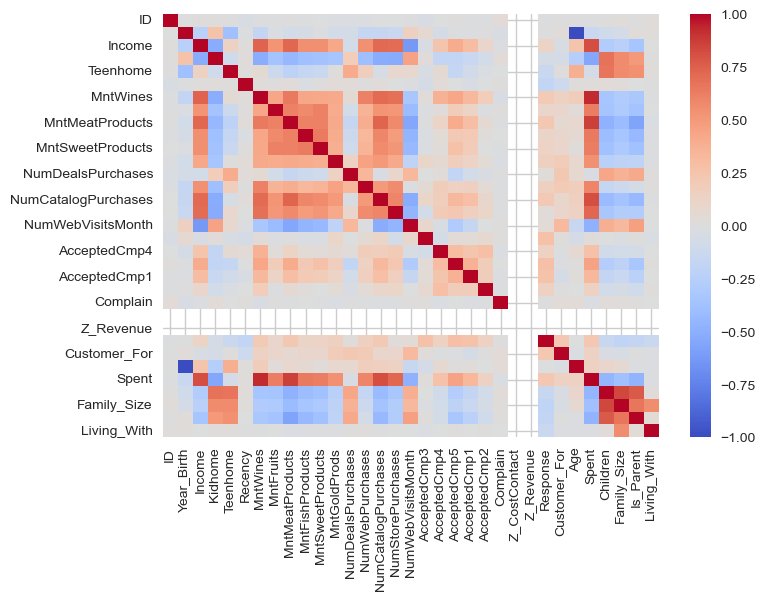

In [106]:
selected_cols = df.columns.drop(['Education', 'Marital_Status', 'Age_Group', 'Dt_Customer'])
corr = df[selected_cols].corr()
sns.heatmap(corr, cmap='coolwarm')

## Question 6

### 1.

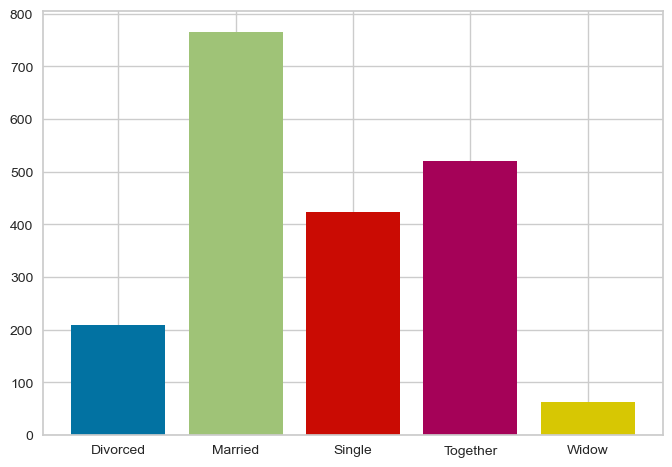

In [107]:
for key in marital_mapping.keys():
	plt.bar(key, df['Marital_Status'].value_counts()[marital_mapping[key]])
plt.show()

### 2.

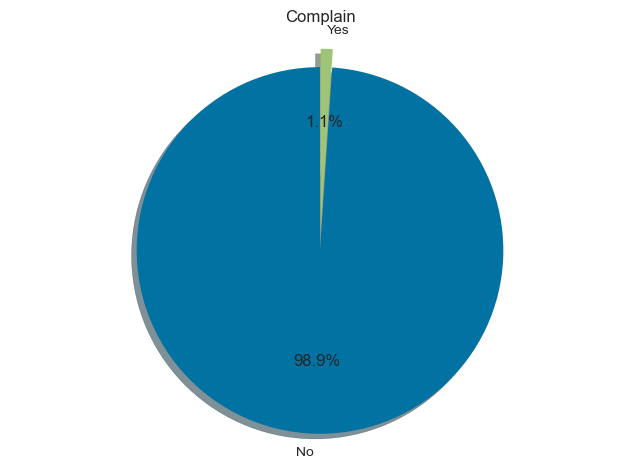

In [108]:
labels = ['No', 'Yes']
sizes = [df['Complain'].value_counts()[0], df['Complain'].value_counts()[1]]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
plt.title('Complain')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

### 3.

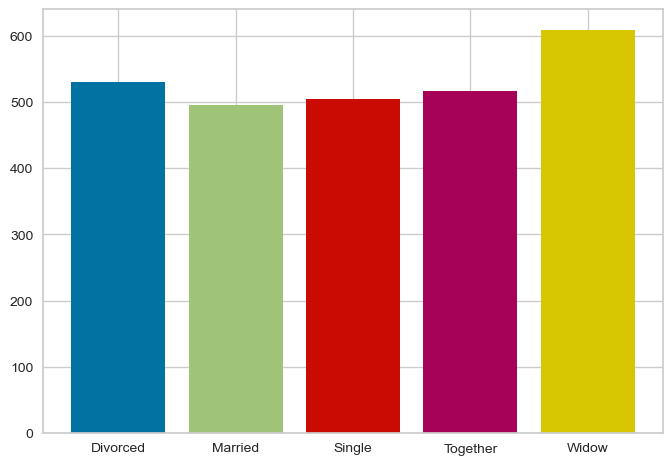

In [109]:
for key in marital_mapping.keys():
	plt.bar(key, df[df['Marital_Status'] == marital_mapping[key]]['Spent'].mean())
plt.show()

### 4.

<Axes: xlabel='Children', ylabel='Family_Size'>

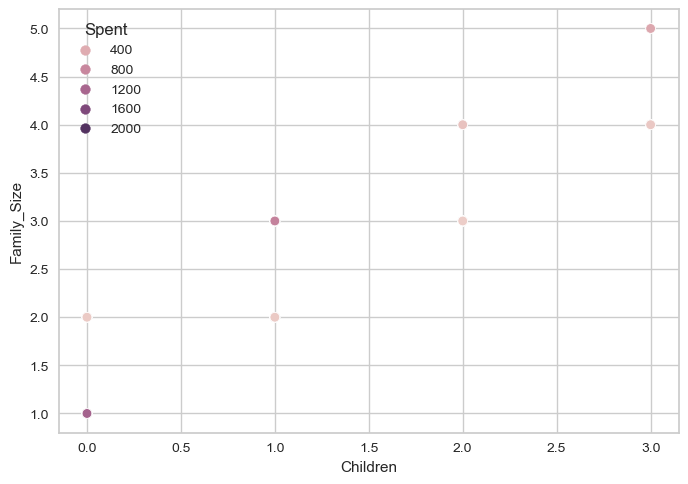

In [110]:
sns.scatterplot(x=df['Children'], y=df['Family_Size'], hue=df['Spent'])

### 5.

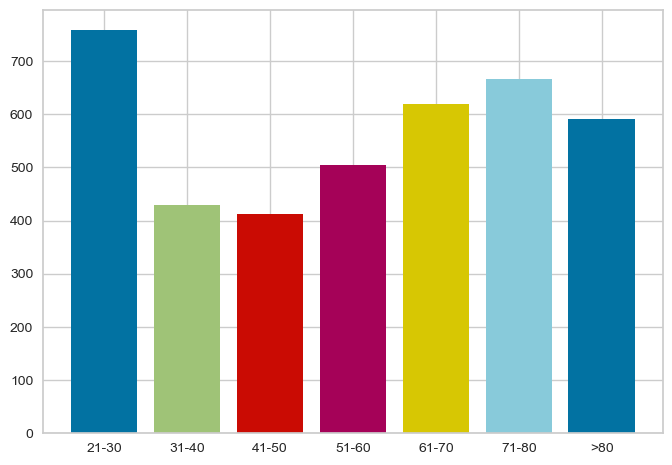

In [111]:
for key in age_group_mapping.keys():
	plt.bar(key, df[df['Age_Group'] == age_group_mapping[key]]['Spent'].mean())
plt.show()

### 6.

<Axes: xlabel='Income', ylabel='Spent'>

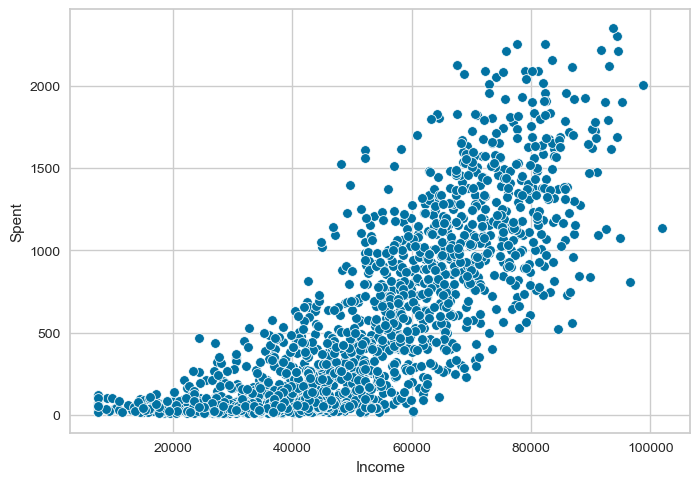

In [112]:
sns.scatterplot(x=df['Income'], y=df['Spent'])

### 7.

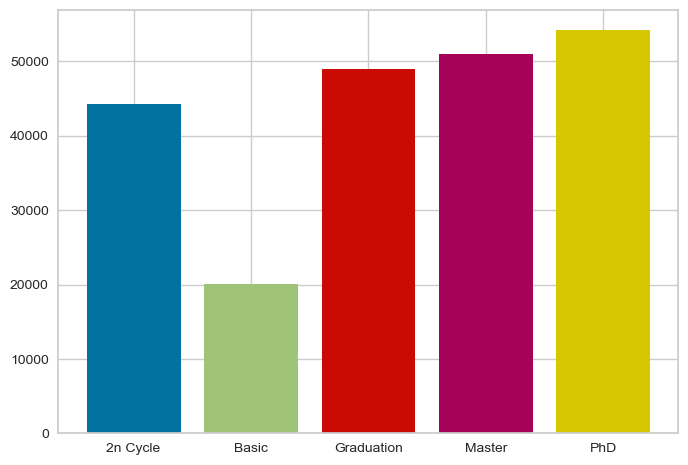

In [113]:
for key in edu_mapping.keys():
	plt.bar(key, df[df['Education'] == edu_mapping[key]]['Income'].mean())
plt.show()

### 8.

<Axes: xlabel='Family_Size', ylabel='Income'>

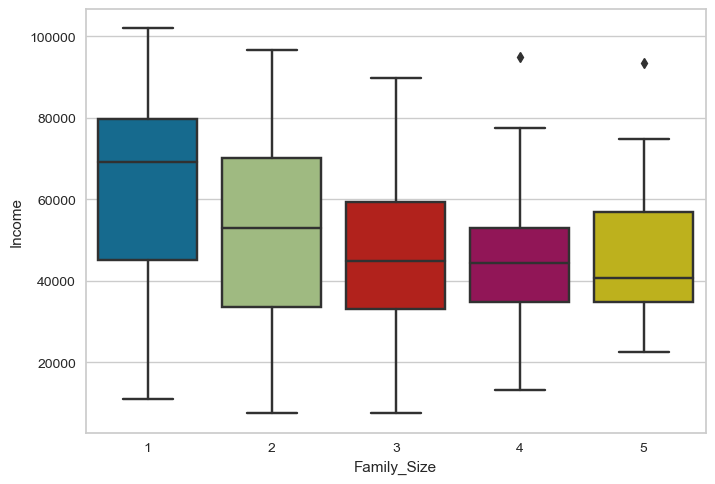

In [114]:
sns.boxplot(x=df['Family_Size'], y=df['Income'])

### 9.

<Axes: xlabel='Children', ylabel='Income'>

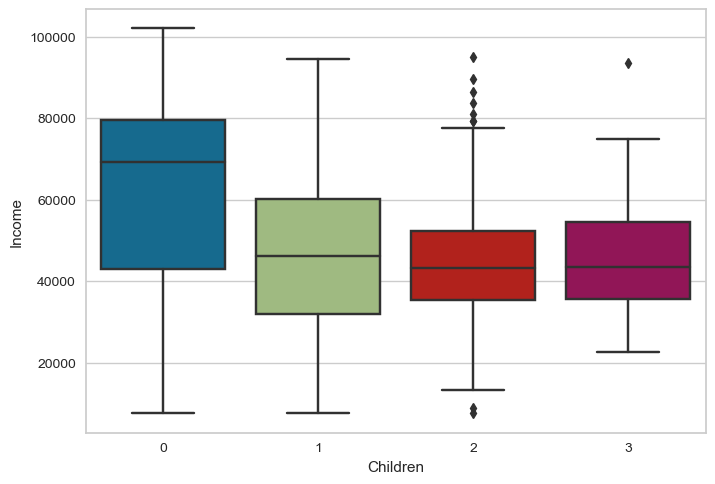

In [115]:
sns.boxplot(x=df['Children'], y=df['Income'])

### 10.

<Axes: xlabel='Living_With', ylabel='Income'>

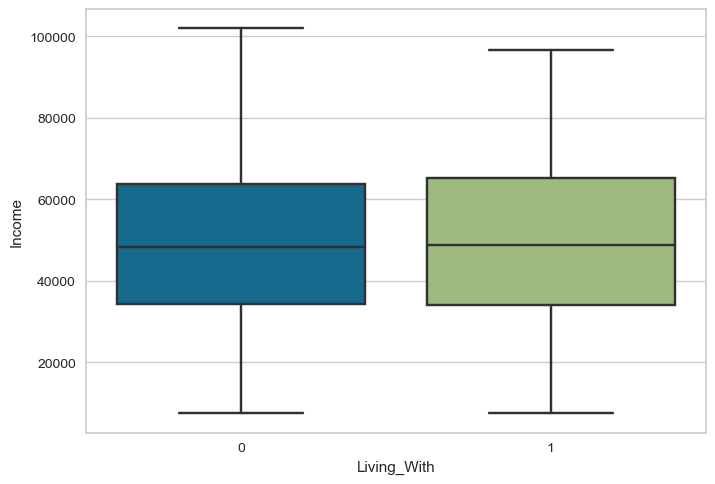

In [116]:
sns.boxplot(x=df['Living_With'], y=df['Income'])

### 11. (same as 6)

<Axes: xlabel='Income', ylabel='Spent'>

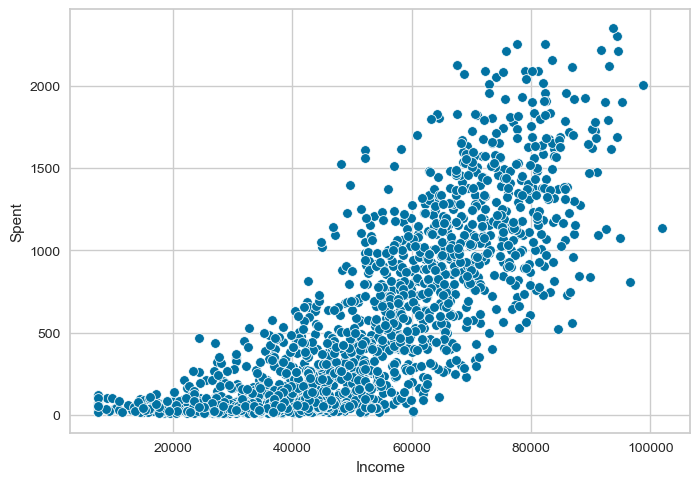

In [117]:
sns.scatterplot(x=df['Income'], y=df['Spent'])

### 12.

<Axes: xlabel='NumWebPurchases', ylabel='NumWebVisitsMonth'>

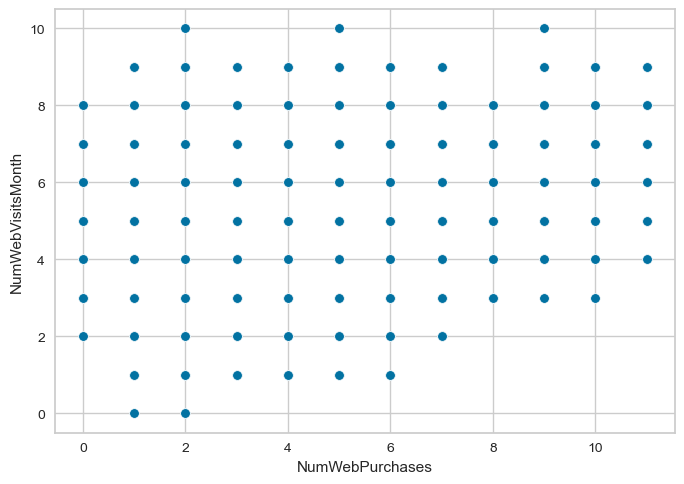

In [118]:
sns.scatterplot(x=df['NumWebPurchases'], y=df['NumWebVisitsMonth'])

### 13.

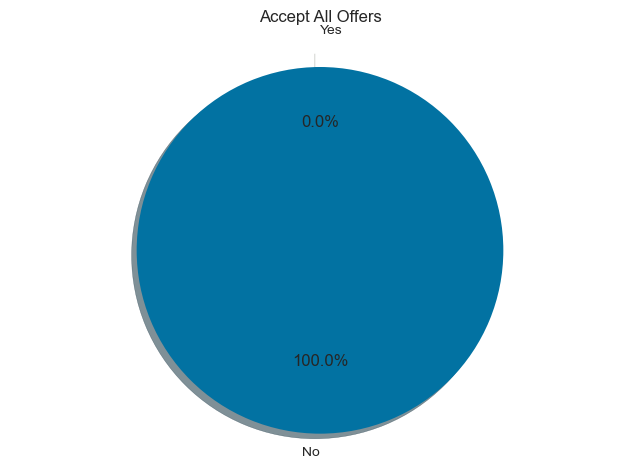

In [119]:
# no if there is 0 in any of the columns and yes if there is 1 in all of the columns
labels = ['No', 'Yes']
sizes = [df[(df['AcceptedCmp1'] == 0) | (df['AcceptedCmp2'] == 0) | (df['AcceptedCmp3'] == 0) | (df['AcceptedCmp4'] == 0) | (df['AcceptedCmp5'] == 0)].shape[0],
df[(df['AcceptedCmp1'] == 1) & (df['AcceptedCmp2'] == 1) & (df['AcceptedCmp3'] == 1) & (df['AcceptedCmp4'] == 1) & (df['AcceptedCmp5'] == 1)].shape[0]]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
plt.title('Accept All Offers')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()


### 14.

<Axes: xlabel='NumDealsPurchases', ylabel='Count'>

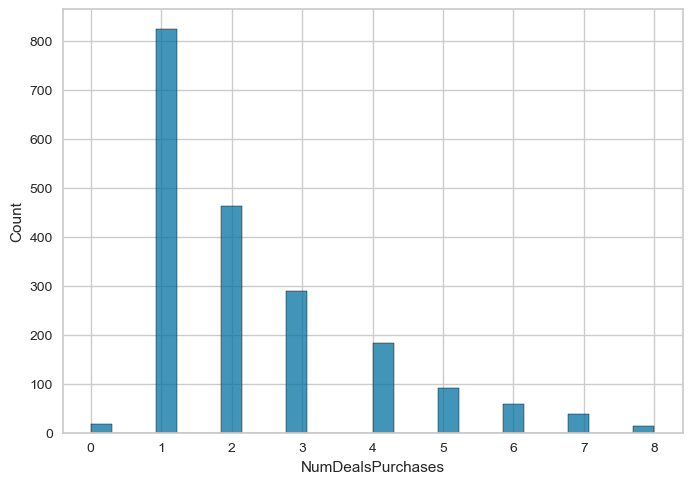

In [120]:
sns.histplot(df['NumDealsPurchases'])

### 15.

<Axes: xlabel='Income', ylabel='Count'>

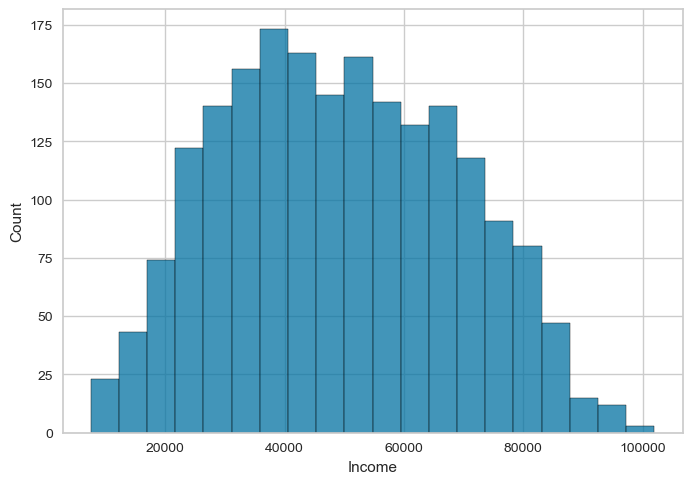

In [121]:
sns.histplot(df['Income'])

### 16.

<Axes: xlabel='Kidhome', ylabel='Count'>

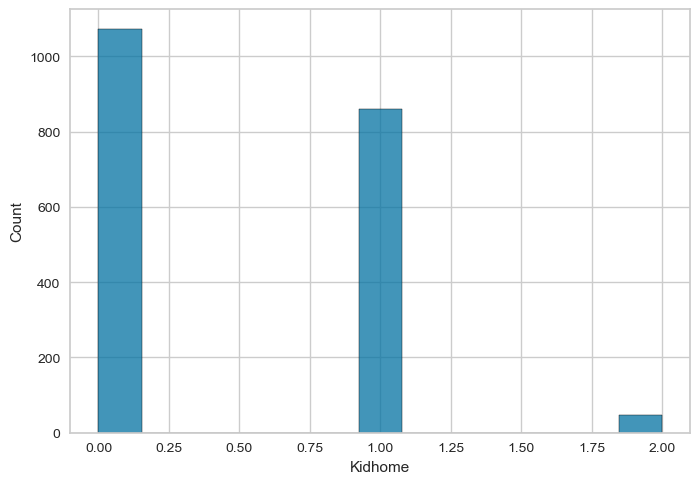

In [122]:
sns.histplot(df['Kidhome'])

### 17.

<Axes: xlabel='Family_Size', ylabel='Count'>

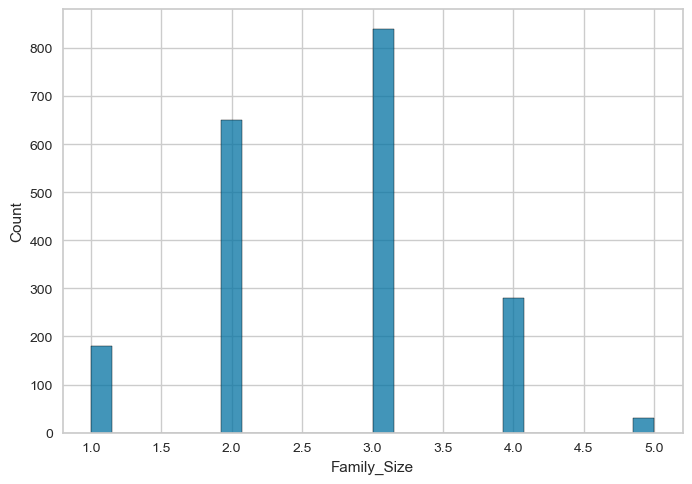

In [123]:
sns.histplot(df['Family_Size'])

## Question 7

### Preprocessing

We have already converted the categorical values to numerical values from question 1 manually without using the LabelEncoder by also keeping the mapping to the original values to be able to reverse the transformation through a dictionary.

In [124]:
selected_cols = ['Marital_Status', 'Education', 'Living_With']
df[selected_cols].head()

,Marital_Status,Education,Living_With
0,2,2,0
1,2,2,0
2,3,2,1
3,3,2,1
4,1,4,1


In [125]:
# create a copy of the dataframe that contains only arithmetical columns
df_copy = df.copy()
# convert Dt_Customer to integer
df_copy['Dt_Customer'] = df_copy['Dt_Customer'].astype('int64')
# drop the columns that are not arithmetical type with dtype
df_copy = df_copy.drop(columns=df_copy.select_dtypes(exclude=['int64', 'float64']).columns)

# we will also delete ID as it is just a unique identifier
selected_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response', 'ID']
df_copy = df_copy.drop(columns=selected_cols)

df1 = df_copy.copy()

In [126]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           1980 non-null   int64  
 1   Education            1980 non-null   int64  
 2   Marital_Status       1980 non-null   int64  
 3   Income               1980 non-null   float64
 4   Kidhome              1980 non-null   int64  
 5   Teenhome             1980 non-null   int64  
 6   Dt_Customer          1980 non-null   int64  
 7   Recency              1980 non-null   int64  
 8   MntWines             1980 non-null   int64  
 9   MntFruits            1980 non-null   int64  
 10  MntMeatProducts      1980 non-null   int64  
 11  MntFishProducts      1980 non-null   int64  
 12  MntSweetProducts     1980 non-null   int64  
 13  MntGoldProds         1980 non-null   int64  
 14  NumDealsPurchases    1980 non-null   int64  
 15  NumWebPurchases      1980 non-null   i

### Standardization

We will standardize features by removing the mean and scaling to unit variance. The standard score of a sample x is calculated as Z-score as defined before.
We choose to use the StandardScaler from sklearn.preprocessing library instead. 
We also use the default parameters of the StandardScaler class. That according to the documentation is:
- `with_mean: bool, default=True`: center the data before scaling
- `with_std: bool, default=True`: scale the data to unit variance

which is exactly what we want.

Additionally, we use the fit_transform method of the StandardScaler class to fit to data, then transform it. This is equivalent to calling fit and transform separately.

The fit method is calculating the mean and standard deviation of each of the features. The transform method is scaling the features using the calculated mean and standard deviation.

In [127]:
scaler = StandardScaler()
df_copy = scaler.fit_transform(df_copy)
print(df_copy.shape)
df_copy

(1980, 29)


array([[-1.00462404, -0.36764649,  0.2553741 , ..., -1.79241902,
        -1.36125895,  0.94832168],
       [-1.25827816, -0.36764649,  0.2553741 , ...,  0.55790526,
        -1.36125895,  0.94832168],
       [-0.32821306, -0.36764649,  1.19873365, ..., -1.79241902,
         0.73461408,  0.11749118],
       ...,
       [ 1.02460891, -0.36764649, -1.63134499, ..., -1.79241902,
        -1.36125895, -0.71333932],
       [-1.08917541,  0.51792535,  1.19873365, ...,  0.55790526,
         0.73461408,  0.94832168],
       [-1.25827816,  1.40349718, -0.68798545, ...,  0.55790526,
         0.73461408,  0.94832168]])

### PCA

As we can see from above, the dataset has 29 features. The problem with this approach is that as higher the dimensionality of the data, the more complex it becomes to analyze and visualize it. This is because the data becomes more sparse and the distance between the data points increases. This is called the curse of dimensionality. Also, we should notice that most of the features are correlated with each other. This means that we can reduce the dimensionality of the data without losing much information. This is where PCA comes in.

We will use the PCA class from sklearn.decomposition library. We will use the default parameters of the PCA class but we will set the number of components to 3 (one reason is to be able to visualize data). According to the documentation, the PCA technique is based on Singular Value Decomposition of the data to project it to a lower dimensional space. The goal is to project the data in a way that the variance is maximized. The components are sorted by `explained_variance_`.

In [128]:
pca = PCA(n_components=3)
df_copy = pca.fit_transform(df_copy)
print(df_copy.shape)
df_copy

(1980, 3)


array([[ 6.42438093, -0.1454956 , -1.5087505 ],
       [-2.52830089,  1.68061944,  2.43081114],
       [ 3.28772161, -0.80738346,  0.72991435],
       ...,
       [ 2.91870516, -2.84875819,  0.86799097],
       [ 2.53854205,  2.21182402,  1.22981742],
       [-2.05515445,  2.95943986, -0.74309737]])

### Plotting the 3D projection

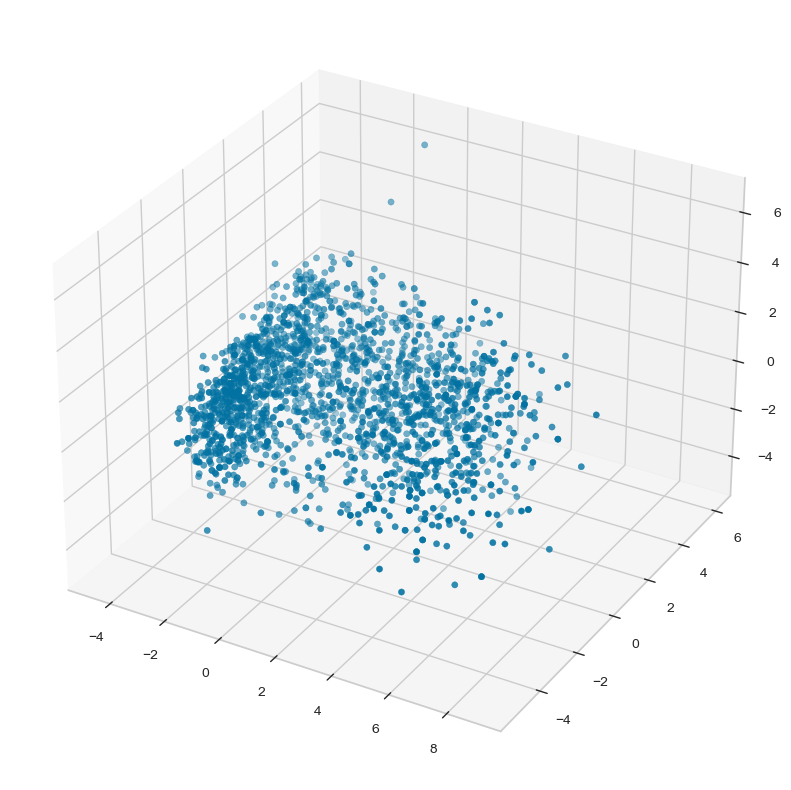

In [129]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_copy[:, 0], df_copy[:, 1], df_copy[:, 2])
plt.show()

## Question 8

### Clustering with KMeans

We use the reduced dimension from PCA (3 components).

In the Elbow method, we are varying the number of clusters from 1 – 10. For each number of clusters, we are initializing k-means and using the inertia attribute of k-means object which returns wcss value. WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids.

For KMeans method, we choose as n_clusters the number of each step of the Elbow method as the algorithm dictates. For init we choose k-means++ as it is more efficient than the standard k-means algorithm (complexity is $O\log(k)$). For n_init we choose a constant to make randomness deterministic for each run.

Lastly, we calculate wcss using the inertia_ attribute of the KMeans class, which is the sum of squared distances of samples to their closest cluster center. We could have also used distortion.

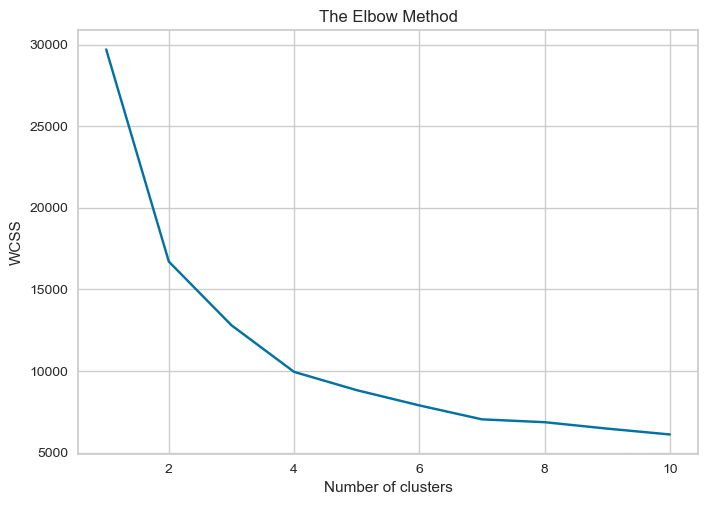

In [130]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
	kmeans = KMeans(n_clusters=i, init='k-means++', random_state=1, n_init='auto')
	kmeans.fit(df_copy)
	wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In the above plot, we can see that after 4, the drop in WCSS isn’t significant. So we choose 4 as the optimal number of clusters, after which the progress is almost linear.

We can also verify that the optimal number of clusters is 4 by using KElbowVisualizer from yellowbrick.cluster library using Distortion score now.

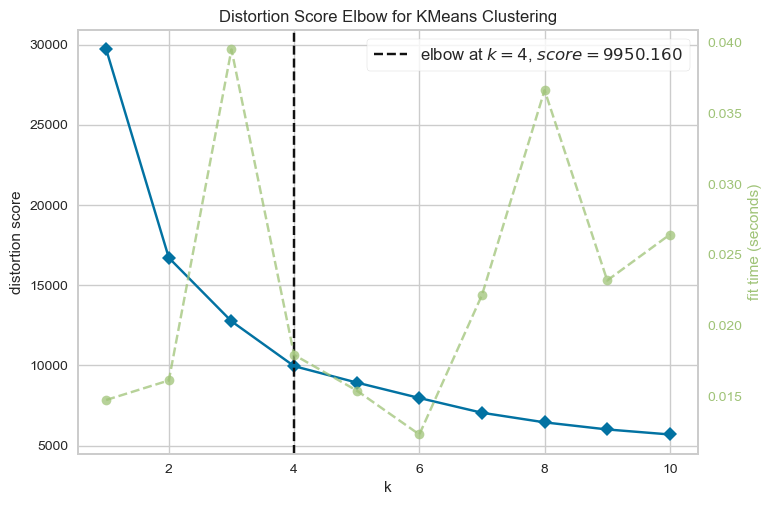

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [131]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(1, 11))
visualizer.fit(df_copy)
visualizer.show()

We now plot the clusters using scatter plot.

We first plot the 4 clusters using all the features (3).

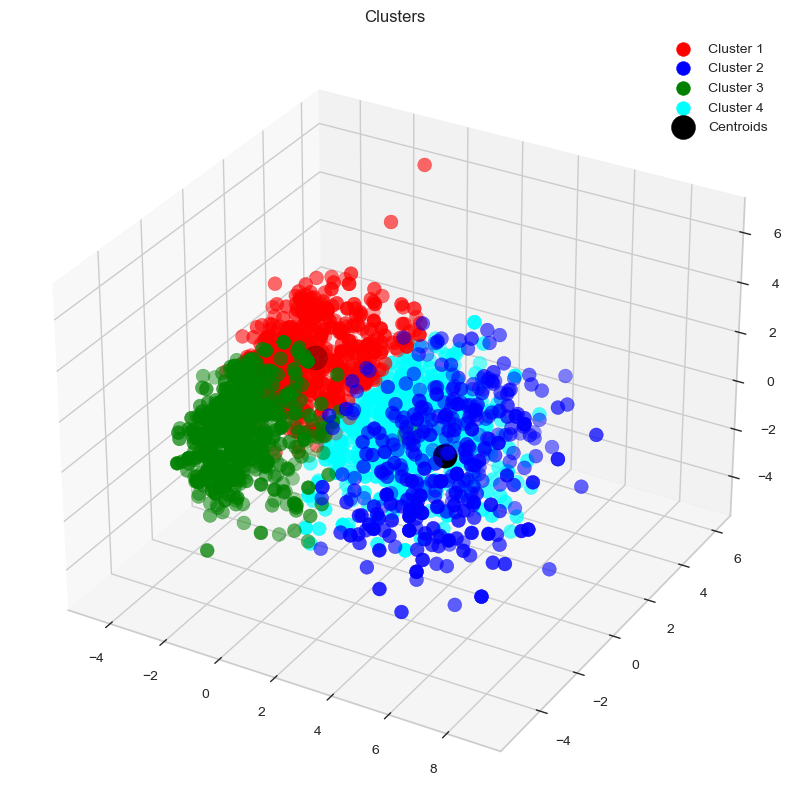

In [132]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=1, n_init='auto')
y_kmeans = kmeans.fit_predict(df_copy)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_copy[y_kmeans == 0, 0], df_copy[y_kmeans == 0, 1], df_copy[y_kmeans == 0, 2], s=100, c='red', label='Cluster 1')
ax.scatter(df_copy[y_kmeans == 1, 0], df_copy[y_kmeans == 1, 1], df_copy[y_kmeans == 1, 2], s=100, c='blue', label='Cluster 2')
ax.scatter(df_copy[y_kmeans == 2, 0], df_copy[y_kmeans == 2, 1], df_copy[y_kmeans == 2, 2], s=100, c='green', label='Cluster 3')
ax.scatter(df_copy[y_kmeans == 3, 0], df_copy[y_kmeans == 3, 1], df_copy[y_kmeans == 3, 2], s=100, c='cyan', label='Cluster 4')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='black', label='Centroids')
ax.set_title('Clusters')
ax.legend()
plt.show()

Subspace Clustering

We also plot the 4 clusters using the first 2 principal components. It is evident that if we had chosen 2 clusters in other order to the subspace, we would have different result as we do not use all the features. If we would like a precise result, we should have reduced the dimensionality of the data to 2 using PCA before.

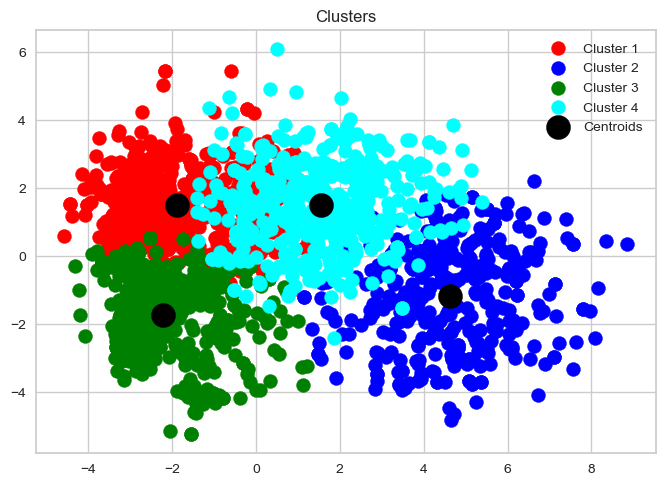

In [133]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=1, n_init='auto')
y_kmeans = kmeans.fit_predict(df_copy)

# 2d plot
plt.scatter(df_copy[y_kmeans == 0, 0], df_copy[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(df_copy[y_kmeans == 1, 0], df_copy[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(df_copy[y_kmeans == 2, 0], df_copy[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(df_copy[y_kmeans == 3, 0], df_copy[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids')
plt.title('Clusters')
plt.legend()
plt.show()

Centroids indicate the center of each cluster. In 3d projection it is not very clear, as it needs rotation.

### Hierarchical agglomerative clustering

Similar with before

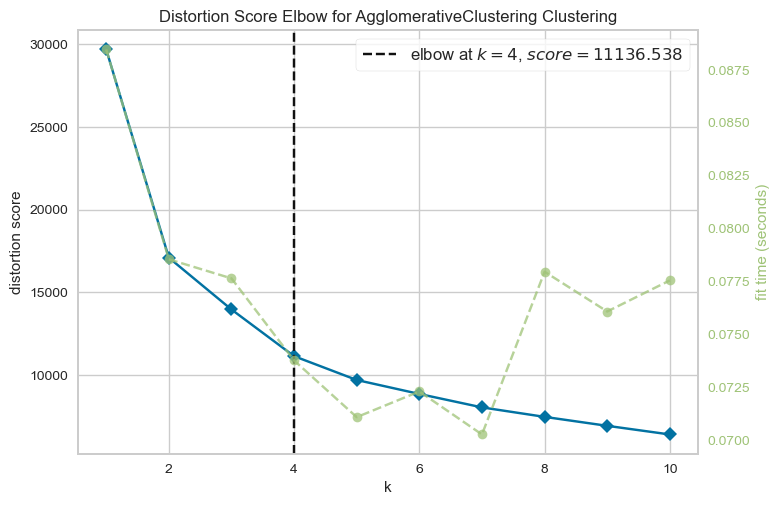

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [134]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(1, 11))
visualizer.fit(df_copy)
visualizer.show()

In [135]:
ac = AgglomerativeClustering(n_clusters=4, metric='euclidean')
y_ac = ac.fit_predict(df_copy)

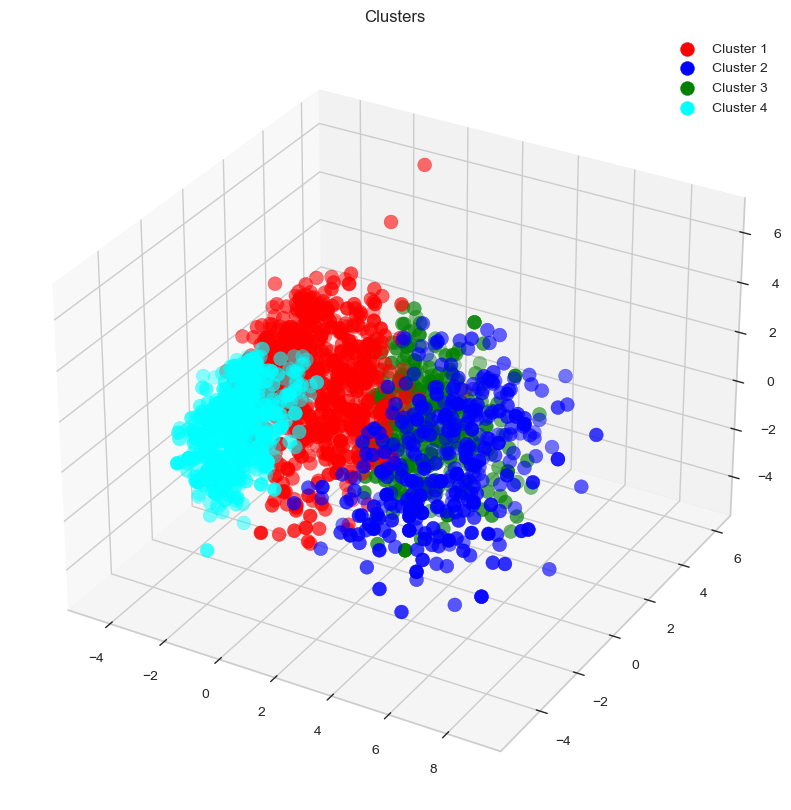

In [136]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_copy[y_ac == 0, 0], df_copy[y_ac == 0, 1], df_copy[y_ac == 0, 2], s=100, c='red', label='Cluster 1')
ax.scatter(df_copy[y_ac == 1, 0], df_copy[y_ac == 1, 1], df_copy[y_ac == 1, 2], s=100, c='blue', label='Cluster 2')
ax.scatter(df_copy[y_ac == 2, 0], df_copy[y_ac == 2, 1], df_copy[y_ac == 2, 2], s=100, c='green', label='Cluster 3')
ax.scatter(df_copy[y_ac == 3, 0], df_copy[y_ac == 3, 1], df_copy[y_ac == 3, 2], s=100, c='cyan', label='Cluster 4')
ax.set_title('Clusters')
ax.legend()
plt.show()

Subspace Clustering

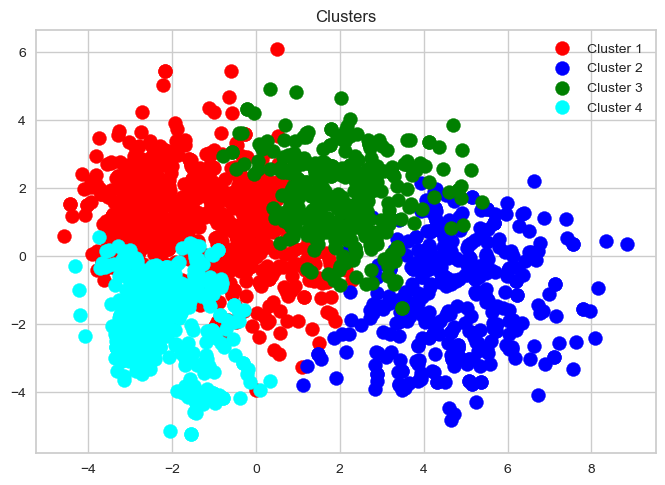

In [137]:
plt.scatter(df_copy[y_ac == 0, 0], df_copy[y_ac == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(df_copy[y_ac == 1, 0], df_copy[y_ac == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(df_copy[y_ac == 2, 0], df_copy[y_ac == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(df_copy[y_ac == 3, 0], df_copy[y_ac == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.title('Clusters')
plt.legend()
plt.show()

### Results

KMeans seems to be more accurate than Hierarchical agglomerative clustering. This is because KMeans is a partitioning method, while Hierarchical agglomerative clustering is an agglomerative method. Generally, KMeans performs better for 2D or 3D data, while Hierarchical agglomerative clustering performs better for higher dimensional data. However,
hierarchical clustering is sensitive to noise and outliers and has worse performance on large datasets.

Also, K-means, using a pre-specified  number of clusters while hierarchical methods can be either divisive or agglomerative. In Hierarchical Clustering, results are reproducible in Hierarchical clustering, while in K-means, results are different every run.

## Question 9

We use the whole modified dataset (with the same preprocessing) but now we will not reduce the dimensionality of the data. We will prefer to use kmeans clustering algorithm.

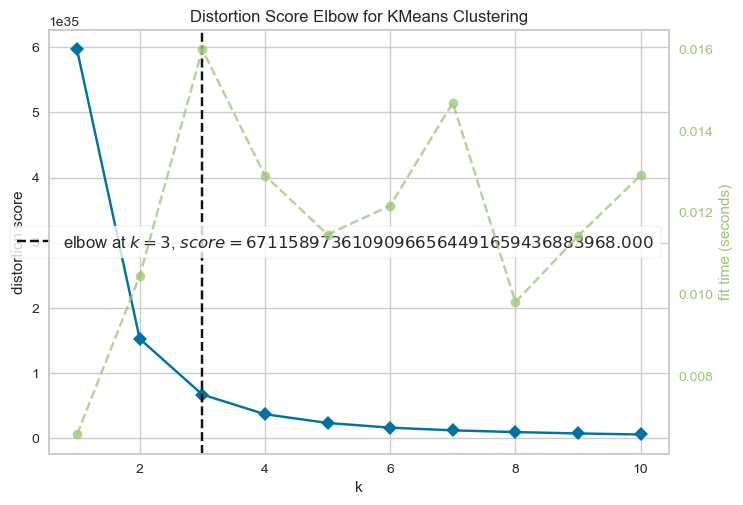

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [138]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(1, 11))
visualizer.fit(df1)
visualizer.show()

Best performing features using pca library

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [29] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [1] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[1]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
     PC              feature       loading  type
0   PC1          Dt_Customer -1.000000e+00  best
1   PC1           Year_Birth -0.000000e+00  weak
2   PC1            Education -3.116006e-18  weak
3   PC1       Marital_Status  1.179836e-19  weak
4   PC1               Income -4.879315e-14  weak
5   PC1              Kidhome -1.843

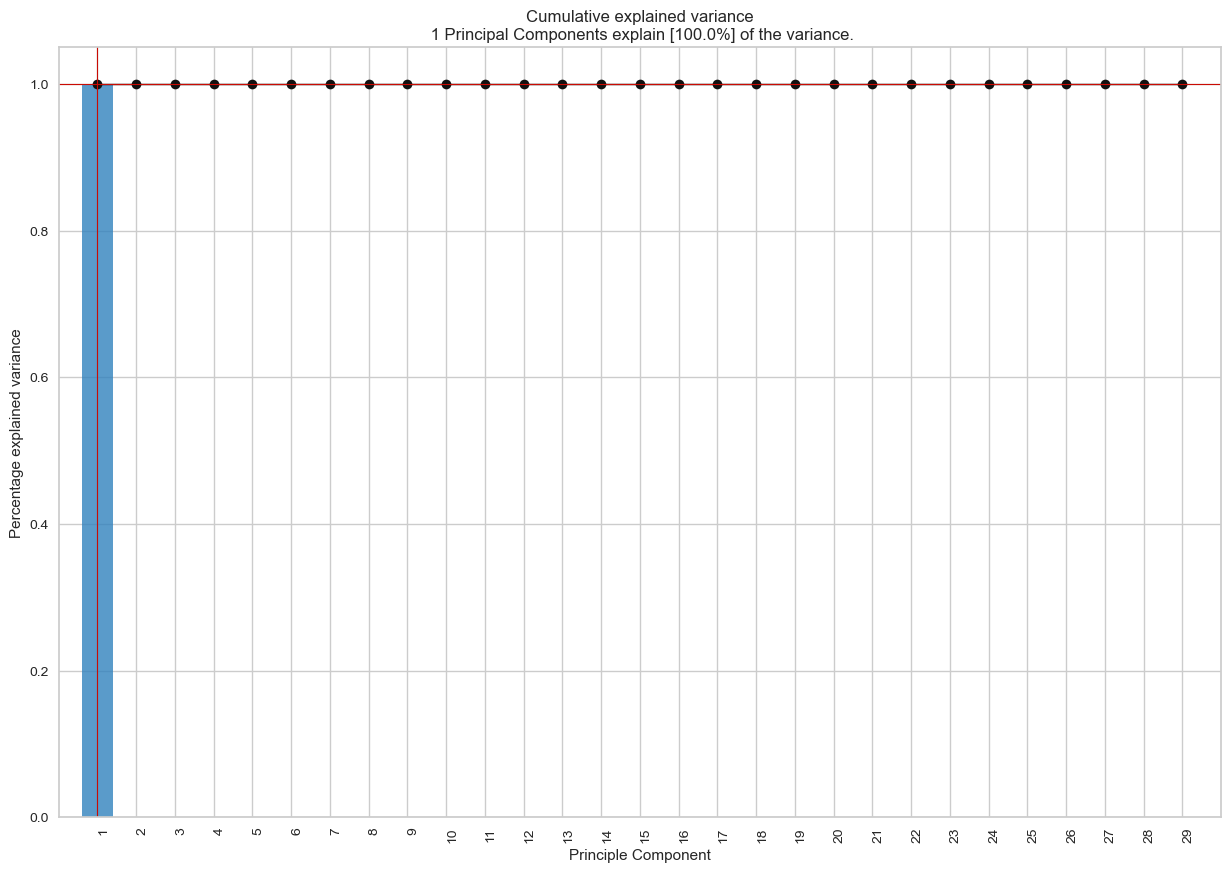

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 1 Principal Components explain [100.0%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 800x550 with 0 Axes>

In [139]:
from pca import pca
model = pca()
out = model.fit_transform(df1)
print(out['topfeat'])
model.plot()

That means that the registration date is the most important feature, it covers 99.9% of the data.

Most important features are Date of enrollment, Income and Spent by using PCA for 3 components. We will also have 3 clusters according to the algorithm. Let's see the first of them:

In [140]:
# convert Dt_Customer to back to datetime
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])

In [141]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=1, n_init='auto')
y_kmeans = kmeans.fit_predict(df_copy)
cluster0 = df1[y_kmeans == 0]
cluster1 = df1[y_kmeans == 1]
cluster2 = df1[y_kmeans == 2]
cluster = [cluster0, cluster1, cluster2]

In [142]:
cluster0

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Z_CostContact,Z_Revenue,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group
1,1954,2,2,46344.0,1,1,2014-03-08,38,11,1,...,3,11,3290,69,27,2,3,1,0,4
5,1967,3,3,62513.0,0,1,2013-09-09,16,520,42,...,3,11,3492,56,716,1,3,1,1,3
13,1952,3,0,59354.0,1,1,2013-11-15,53,233,2,...,3,11,3388,71,310,2,3,1,0,5
17,1946,2,3,37760.0,0,0,2012-08-31,20,84,5,...,3,11,3862,77,317,0,2,0,1,5
22,1949,4,1,58607.0,0,1,2012-12-23,63,867,0,...,3,11,3705,74,972,1,3,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,1968,2,3,58554.0,1,1,2012-09-26,55,368,24,...,3,11,3801,55,586,2,4,1,1,3
2226,1979,2,1,63777.0,1,1,2013-03-24,87,457,5,...,3,11,3590,44,653,2,4,1,1,2
2227,1962,2,2,57967.0,0,1,2013-03-03,39,229,7,...,3,11,3659,61,468,1,2,1,0,4
2236,1946,4,3,64014.0,2,1,2014-06-10,56,406,0,...,3,11,3178,77,444,3,5,1,1,5


In [143]:
# find most important features for each cluster
for i in range(3):
	print('Cluster', i)
	print(cluster[i].describe())
	

Cluster 0
        Year_Birth   Education  Marital_Status        Income     Kidhome  \
count   743.000000  743.000000      743.000000    743.000000  743.000000   
mean   1962.290713    2.648721        1.795424  48691.890328    0.511440   
std       9.280970    1.052091        1.107986  12592.327176    0.573038   
min    1893.000000    0.000000        0.000000   8820.000000    0.000000   
25%    1955.000000    2.000000        1.000000  40277.000000    0.000000   
50%    1963.000000    2.000000        2.000000  49154.000000    0.000000   
75%    1969.000000    4.000000        3.000000  57354.000000    1.000000   
max    1981.000000    4.000000        4.000000  93404.000000    2.000000   

         Teenhome     Recency     MntWines   MntFruits  MntMeatProducts  ...  \
count  743.000000  743.000000   743.000000  743.000000       743.000000  ...   
mean     1.008075   49.900404   230.880215    8.368775        60.694482  ...   
std      0.328255   29.093970   243.406137   13.241534        61.

We will now choose some of the features to try describe the clusters profile.

In [144]:
def print(*args):
    __builtins__.print(*("%.1f" % a if isinstance(a, float) else a
                         for a in args))

In [145]:
# for each cluster find the profile of customers
features = ['Dt_Customer', 'Income', 'Spent', 'Age_Group', 'Education', 'Recency', 'Children', 'Is_Parent', 'MntWines', 'MntFruits', 'MntGoldProds', 'NumWebPurchases', 'NumWebVisitsMonth']
print('\033[1m' + 'Income' + '\033[0m')
for i in range(3):
	for j in features:
		print('Cluster', i+1, j, 'min:', cluster[i][j].min(), 'max:', cluster[i][j].max(), 'mean:', cluster[i][j].mean(), 'median:', cluster[i][j].median(), 'std:', cluster[i][j].std(),
			'75%:', cluster[i][j].quantile(0.25), '95%:', cluster[i][j].quantile(0.75))
	print('-'*50)


Income
Cluster 1 Dt_Customer min: 2012-07-30 00:00:00 max: 2014-06-29 00:00:00 mean: 2013-07-15 17:36:15.504710656 median: 2013-07-18 00:00:00 std: 201 days 11:23:30.791004634 75%: 2013-01-27 12:00:00 95%: 2014-01-10 00:00:00
Cluster 1 Income min: 8820.0 max: 93404.0 mean: 48691.9 median: 49154.0 std: 12592.3 75%: 40277.0 95%: 57354.0
Cluster 1 Spent min: 8 max: 1616 mean: 350.9 median: 270.0 std: 314.2 75%: 81.0 95%: 507.0
Cluster 1 Age_Group min: 2 max: 6 mean: 3.5 median: 3.0 std: 0.9 75%: 3.0 95%: 4.0
Cluster 1 Education min: 0 max: 4 mean: 2.6 median: 2.0 std: 1.1 75%: 2.0 95%: 4.0
Cluster 1 Recency min: 0 max: 99 mean: 49.9 median: 51.0 std: 29.1 75%: 25.0 95%: 75.5
Cluster 1 Children min: 0 max: 3 mean: 1.5 median: 1.0 std: 0.6 75%: 1.0 95%: 2.0
Cluster 1 Is_Parent min: 0 max: 1 mean: 1.0 median: 1.0 std: 0.2 75%: 1.0 95%: 1.0
Cluster 1 MntWines min: 1 max: 1279 mean: 230.9 median: 154.0 std: 243.4 75%: 41.0 95%: 348.0
Cluster 1 MntFruits min: 0 max: 123 mean: 8.4 median: 4.0 st

The following table shows the *average* values of the features for each cluster.

|                   |      Cluster 1      |      Cluster 2      |             Cluster 3             |
| :---------------: | :-----------------: | :-----------------: | :-------------------------------: |
|      Enroll       | 2013 - 2nd semester | 2013 - 2nd semester |        2013 - 2nd semester        |
|      Income       |       middle        |    high(~70.000)    |           low(~30.000)            |
|       Spent       |  average(~250-350)  |     most(~1200)     |           least(50-100)           |
|     Age group     |         41+         |         all         |               21-80               |
|     Education     |      graduate       |      graduate       | graduate (less educated a little) |
|      Recency      |       50 days       |       50 days       |              50 days              |
|     Children      |         1-2         |         0-1         |                 1                 |
|     MntWines      |       150-200       |       550-600       |               15-30               |
|     MntFruits     |         4-8         |        40-50        |                3-6                |
|   MntGoldProds    |        20-30        |        50-70        |               10-15               |
|  NumWebPurchases  |          4          |          5          |                 2                 |
| NumWebVisitsMonth |          6          |          3          |                 7                 |
|     Is Parent     |       Always        |    Almost never     |           Almost always           |


From the above table, we can see we have 3 categories we should target (customers's profiles).
Generally, they are what we wait, e.g. the rich ones spend the most, they buy the most products from all categories, they are not parents.
However, there are some surprises, e.g. the rich ones buy lot of fruits! Those with middle income do not spend analogically to the rich ones, but they are more frequent in the website. That could mean that they prefer to compare the products and prices before buying.

What we include is that each cluster is mainly differentiated by the income.

Let's verify it! Similar results are for all three clusters.

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [28] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [1] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [28] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[1]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
     PC              feature   loading  type
0   PC1               Income  0.999794  best
1   PC1           Year_Birth  0.000069  weak
2   PC1            Education  0.000009  weak
3   PC1       Marital_Status -0.000005  weak
4   PC1              Kidhome -0.000014  weak
5   PC1             Teenhome  0.000004  weak
6   PC1       

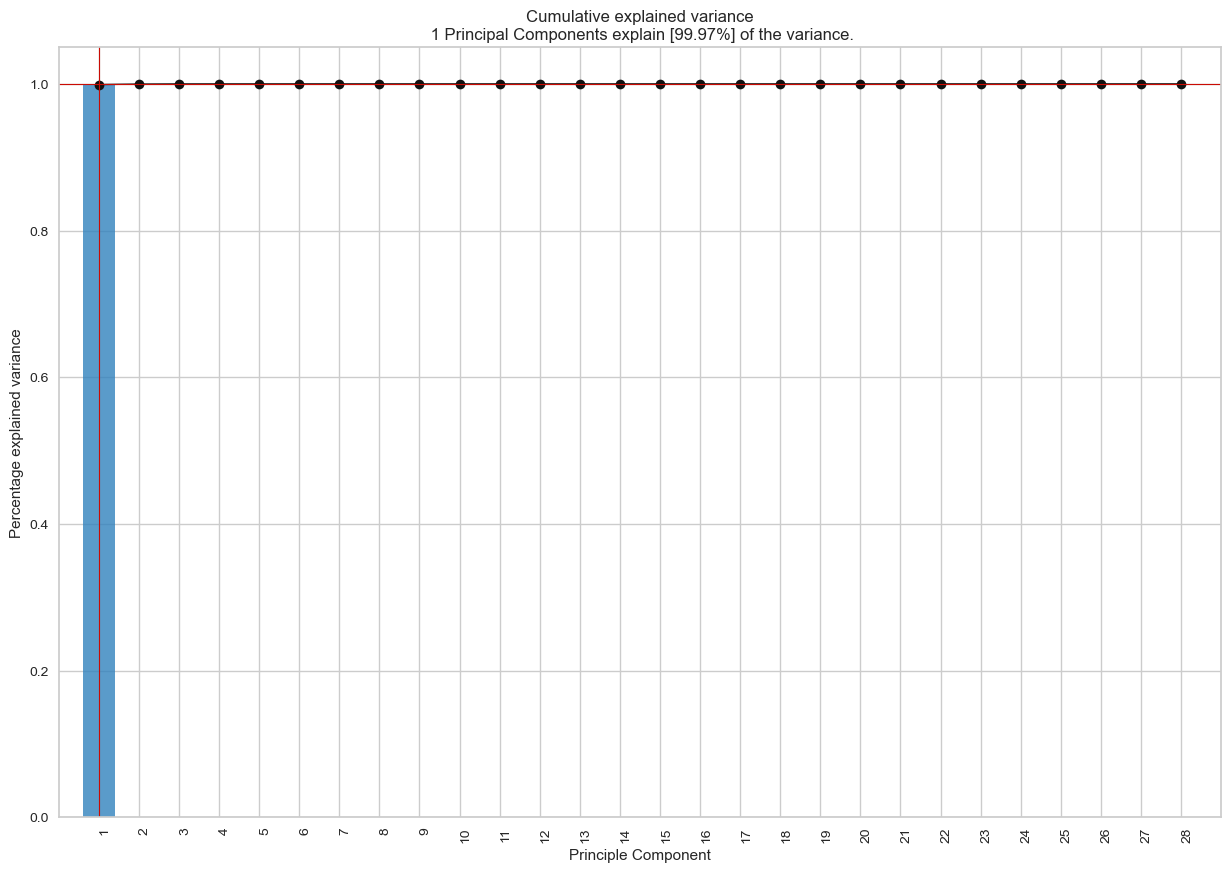

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 1 Principal Components explain [99.97%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 800x550 with 0 Axes>

In [146]:
from pca import pca
cluster0_copy = cluster0.copy()
cluster0_copy.drop(['Dt_Customer'], axis=1, inplace=True)
model = pca()
out = model.fit_transform(cluster0_copy)
print(out['topfeat'])
model.plot()